In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(3) #to look at the data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
#To inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
#Summary Statistics:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum() #Checking missing values

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

For a particular course, the total marks is 100. So let's set passmark has 35 marks.

In [10]:
#initializing the passmarks
passmark=35

Grading System

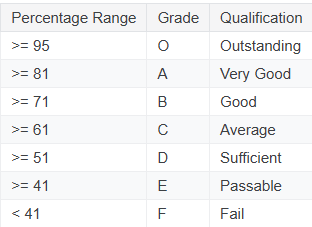



Creating three new columns: Total_Marks, Percentage and grade

In [11]:
 df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

In [12]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [13]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


In [14]:
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [15]:
df["gender"].value_counts()

,count
gender,
female,518
male,482


Data Visualization

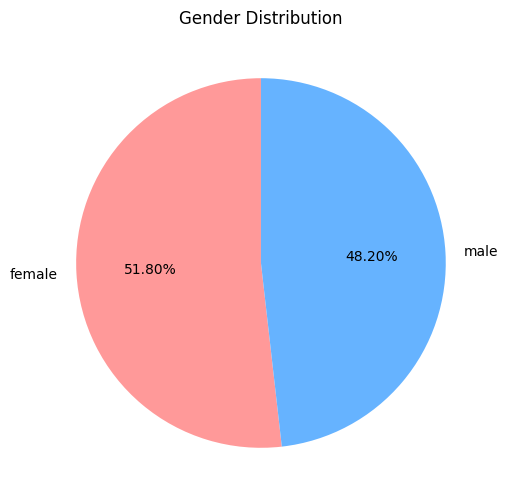

In [20]:
counts = [518, 482]
labels = ['female', 'male']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()


Out of the total number of students, 51.80% are females while 48.20% are males

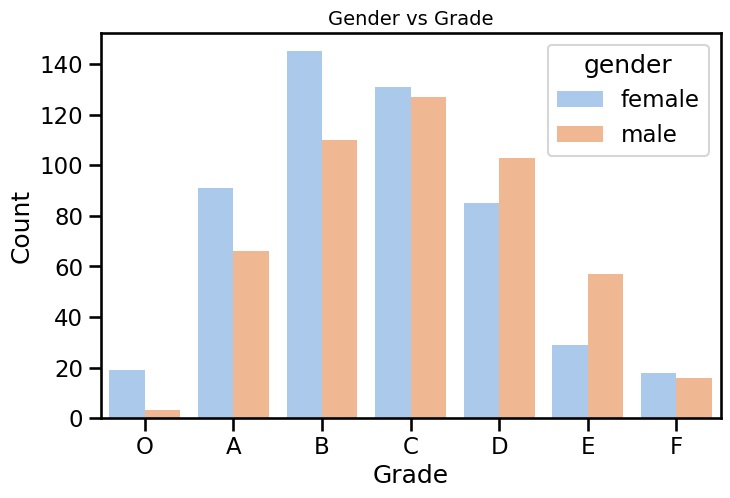

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
plt.title('Gender vs Grade', fontsize=14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


Both male and female students mostly get average grades (B and C). Females have more top grades (A and B), while males have more lower grades (D and E). Overall, grade distribution is similar for both genders.

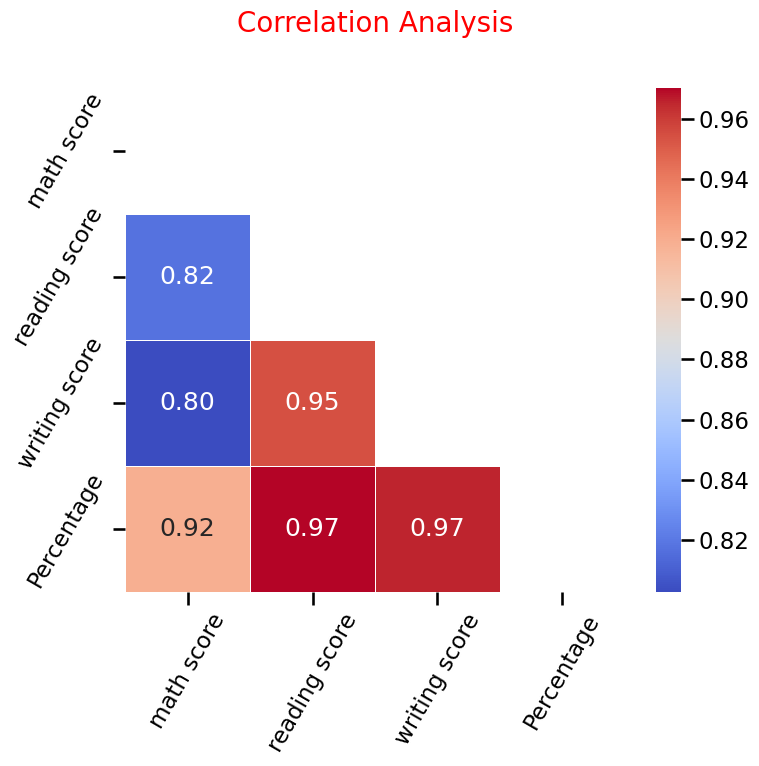

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize=(8, 8))
plt.title('Correlation Analysis', color='red', fontsize=20, pad=40)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.tight_layout()
plt.show()


Most of the scores are similar, indicating consistent performance across all three courses. The overall achievement in each course is average.